The purpose of this notebook is to gather option chains for lists of companies and analyze the data. It uses yfinance to obtain the data.

The analysis involves using the black scholes equation, and comparing it to current option prices in order to find an options arbitrage oppertunity. 

The curreny strategy uses a straddle to reduce directional risk This can obviously be improved upon, and because of that this system needs to be modularized.

In [1]:
import sys
import datetime
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
sys.path.append('./formulas')
sys.path.append('./data')
from optionchain import option_chain
from option import option_parser, options_valuation
from blackscholes import call, put



In [3]:
ticker = 'CPB'

This function returns all calls, puts, the current beta, and price

In [7]:
chain = option_chain(ticker)

In [12]:
calls, puts = options_valuation(chain, ticker, call, put)

The options are sorted into calls and puts, and within these structures, by expiry date. Within expiry date, by strike. Within this, (value, price)

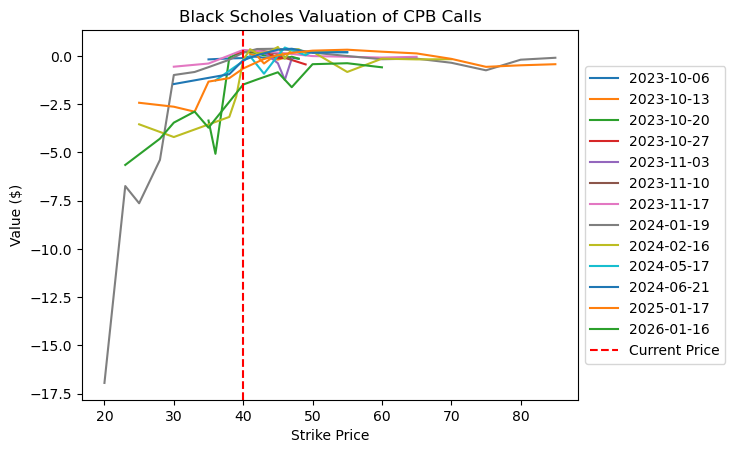

In [13]:
for expiryDate in calls:
    value_map = {}
    for strike in calls[expiryDate]:
        value_map[strike] = (calls[expiryDate][strike][0] - calls[expiryDate][strike][1])
    # Plot the value map
    plt.plot(value_map.keys(), value_map.values())
    plt.xlabel('Strike Price')
    plt.ylabel('Value ($)')
plt.colormaps()

    # Add legend
dates = ["20"+k[:2]+"-"+k[2:4]+"-"+k[4:] for k in calls.keys()]
plt.title('Black Scholes Valuation of ' + ticker + ' Calls')
plt.axvline(x=price, color='r', linestyle='--')
plt.legend(dates + ['Current Price'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

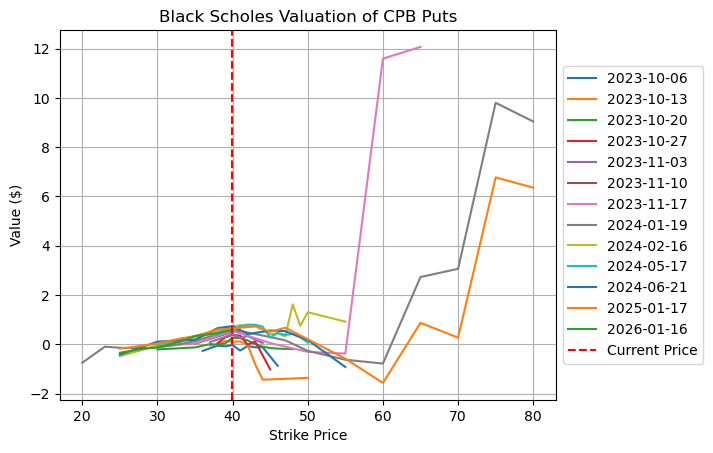

In [14]:
for expiryDate in puts:
    value_map = {}
    for strike in puts[expiryDate]:
        value_map[strike] =  (puts[expiryDate][strike][0] - puts[expiryDate][strike][1]) 
    
    # Plot the value map
    plt.plot(value_map.keys(), value_map.values())
    plt.xlabel('Strike Price')
    plt.ylabel('Value ($)')

    # Add legend
dates = ["20"+k[:2]+"-"+k[2:4]+"-"+k[4:] for k in puts.keys()]
plt.axvline(x=price, color='r', linestyle='--')
# move legend to right of chart
plt.legend(dates + ['Current Price'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Black Scholes Valuation of ' + ticker + ' Puts')
plt.grid()

def update():
    
    plt.plot(value_map.keys(), value_map.values())

plt.show()

In [ ]:
# print('Calls')
# c = []
# for expiryDate in calls:
#     for strike in calls[expiryDate]:
#         if calls[expiryDate][strike][0] - calls[expiryDate][strike][1] > 0 and calls[expiryDate][strike][0] > 0:
#             print('Strike ' + str(strike) + ' and expiry ' + expiryDate + ". The value is " + str(calls[expiryDate][strike][0]))
#             c.append(calls[expiryDate][strike][0])
# p = []
# print('Puts')
# for expiryDate in puts:
#     for strike in puts[expiryDate]:
#         if puts[expiryDate][strike][0] - puts[expiryDate][strike][1] > 0 and puts[expiryDate][strike][0] > 0:
#             print('Strike ' + str(strike) + ' and expiry ' + expiryDate + ". The value is " + str(puts[expiryDate][strike][0] ))
#             p.append(puts[expiryDate][strike][0])

# print('Max Call: ' + str(max(c)))
# print('Max Put: ' + str(max(p)))



Calls
Strike 41.0 and expiry 231013. The value is 0.35289342434389503
Strike 42.0 and expiry 231013. The value is 0.14859610614244367
Strike 39.0 and expiry 231020. The value is 1.5349983860264835
Strike 40.0 and expiry 231020. The value is 0.9935495029450827
Strike 41.0 and expiry 231020. The value is 0.5996910833148767
Strike 42.0 and expiry 231020. The value is 0.3365669876878794
Strike 43.0 and expiry 231020. The value is 0.17541225836740182
Strike 44.0 and expiry 231020. The value is 0.0848980346257151
Strike 39.0 and expiry 231027. The value is 1.7262828966256585
Strike 40.0 and expiry 231027. The value is 1.2008317229541738
Strike 41.0 and expiry 231027. The value is 0.7976826774431593
Strike 42.0 and expiry 231027. The value is 0.5054375843807257
Strike 43.0 and expiry 231027. The value is 0.3053765120236731
Strike 44.0 and expiry 231027. The value is 0.1759741469770093
Strike 42.0 and expiry 231103. The value is 0.6566338246680736
Strike 43.0 and expiry 231103. The value is 0.